In [3]:
# Visualization of data from Kato, et al. (2015)
# Benjamin Jack benjaminjack@gmail.com

#First, let's import necessary libraries 
#along with Kato's data using the scripts by @theideasmith

%matplotlib inline
#import transform as tf

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [4]:
import transform as tf
# choose one trial arbitrarily
wd = tf.wormData['TS20140905c_lite-1_punc-31_NLS3_AVHJ_0eggs_1mMTet_basal_1080s.mat']
#select fluorescence bleach cancelled data
wdDFOFbc = wd['deltaFOverF_bc']
#select derivative
wdDFOFderiv = wd['deltaFOverF_deriv']

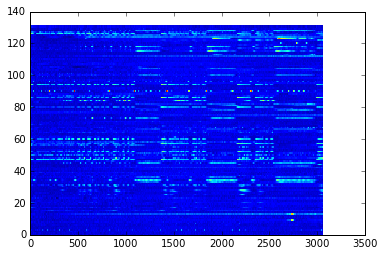

In [5]:
# We plot the deltaF over F data 
# for one trial, selected arbitrarily
plt.pcolor(wdDFOFbc.T)

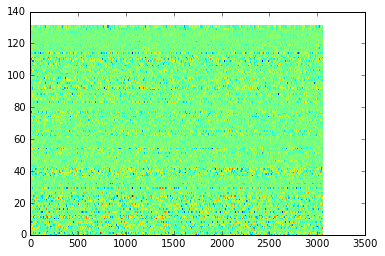

In [82]:
# Can we calculate the derivatives ourselves 
# from the fluorescence bleach cancelled data?

# Attempting to normalize by the peak magnitude 
# of corresponding deltaF/F trace, per Kato supplement p.9
delta = lambda x: ((x - np.roll(x, 1, axis=0))/np.amax(x, axis=0))[1:]
calculatedDeltas = delta(wdDFOFbc)
plt.pcolor(calculatedDeltas.T)

# When we plot, we see the data still looks very noisy.

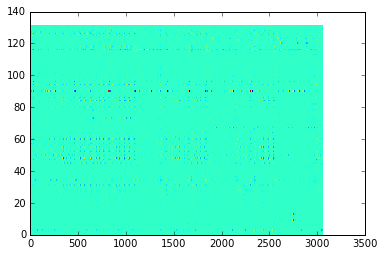

In [61]:
# Let's use the de-noised derivatives computed by Kato instead
plt.pcolor(wdDFOFderiv.T)

In [66]:
# We run PCA on the de-noised derivatives provided by Kato
pca = PCA(n_components=3)
pca.fit(wdDFOFderiv)

PCA(copy=True, n_components=3, whiten=False)

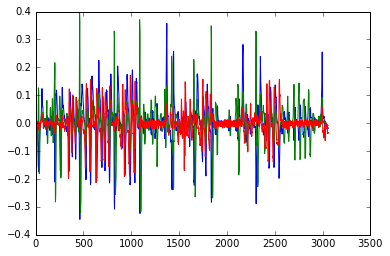

In [67]:
# And we can visualize the results of the PCA
# I chose a style of visualization different 
# from the one Kato uses, just to see 
# how the data looks plotted differently
pca_wdDFOFderiv = pca.transform(wdDFOFderiv)
plt.plot(pca_wdDFOFderiv)

In [83]:
# Let's try the PCA with our calculated derivatives
pca = PCA(n_components=3)
pca.fit(calculatedDeltas)

PCA(copy=True, n_components=3, whiten=False)

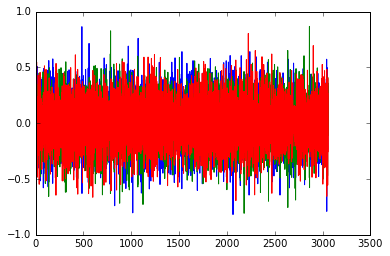

In [84]:
# As expected, the plot is much noisier
pca_calculatedDeltas = pca.transform(calculatedDeltas)
plt.plot(pca_calculatedDeltas)